In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import yfinance as yf
import datetime as dt
from datetime import datetime,timedelta
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df=pd.read_csv("ICICIGI.NS (1).csv")

In [ ]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-11,1616.099976,1621.000000,1586.400024,1609.699951,1576.548706,543087.0
1,2021-01-12,1607.400024,1616.900024,1556.800049,1565.949951,1533.699707,451933.0
2,2021-01-13,1570.599976,1584.300049,1533.400024,1549.000000,1517.098877,554839.0
3,2021-01-14,1556.099976,1564.050049,1535.699951,1554.699951,1522.681519,299112.0
4,2021-01-15,1558.000000,1576.000000,1528.900024,1550.849976,1518.910645,347984.0
...,...,...,...,...,...,...,...
636,2023-08-04,1350.000000,1374.949951,1346.599976,1366.900024,1366.900024,285450.0
637,2023-08-07,1368.099976,1422.000000,1368.099976,1398.199951,1398.199951,1109451.0
638,2023-08-08,1411.949951,1419.900024,1388.150024,1415.900024,1415.900024,778913.0
639,2023-08-09,1410.000000,1410.000000,1386.500000,1394.000000,1394.000000,404048.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       641 non-null    object 
 1   Open       640 non-null    float64
 2   High       640 non-null    float64
 3   Low        640 non-null    float64
 4   Close      640 non-null    float64
 5   Adj Close  640 non-null    float64
 6   Volume     640 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.2+ KB


In [ ]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#df['Date']=df.index

In [ ]:
df=df[['Date','Close']]
df.head()

,Date,Close
0,2021-01-11,1609.699951
1,2021-01-12,1565.949951
2,2021-01-13,1549.000000
3,2021-01-14,1554.699951
4,2021-01-15,1550.849976


In [ ]:
df['Close'].fillna( method ='ffill', inplace = True)


<ipython-input-9-fb1d2bd5fb55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'].fillna( method ='ffill', inplace = True)


In [ ]:
#fig=px.line(df,x='Date',y=df.columns,title='ICICI LOMBARD Stock Price')
fig=px.line(df,x='Date',y=df.columns,title='ICICI LOMBARD Stock Price')
fig.show()

In [ ]:
df.describe()


,Close
count,641.000000
mean,1322.449139
std,155.063778
min,1059.599976
25%,1200.150024
50%,1318.400024
75%,1453.650024
max,1638.050049


In [ ]:
X=df['Close']

In [ ]:
X

0      1609.699951
1      1565.949951
2      1549.000000
3      1554.699951
4      1550.849976
          ...     
636    1366.900024
637    1398.199951
638    1415.900024
639    1394.000000
640    1394.000000
Name: Close, Length: 641, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(X,test_size=0.2)

In [ ]:
(X_train)

89     1479.849976
227    1420.949951
13     1315.500000
208    1536.550049
570    1088.449951
          ...     
560    1130.750000
416    1234.849976
351    1113.949951
628    1373.099976
608    1281.500000
Name: Close, Length: 512, dtype: float64

In [ ]:
#stationarity check on data
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df):
  result=adfuller(df)
  print('ADF Statistic:',result[0])
  print('P-Value: %f'% result[1])
  if result[1]<=0.05:
    print('reject the null hypothesis data is stationary')
  else:
    print('fall to reject the null hypothesis.Data is not stationary')

In [ ]:
check_stationarity(df['Close'])

ADF Statistic: -1.9299003701969506
P-Value: 0.318128
fall to reject the null hypothesis.Data is not stationary


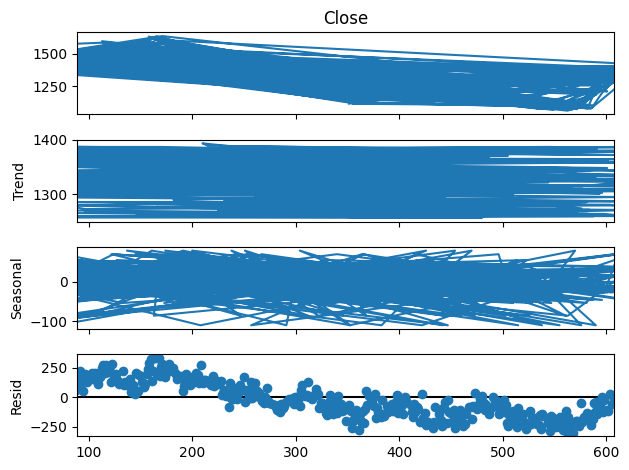

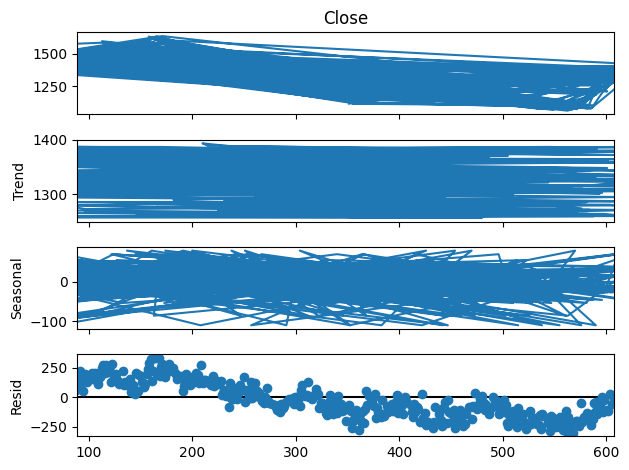

In [ ]:
decompose=seasonal_decompose(X_train,model='additive',period=30)
decompose.plot()


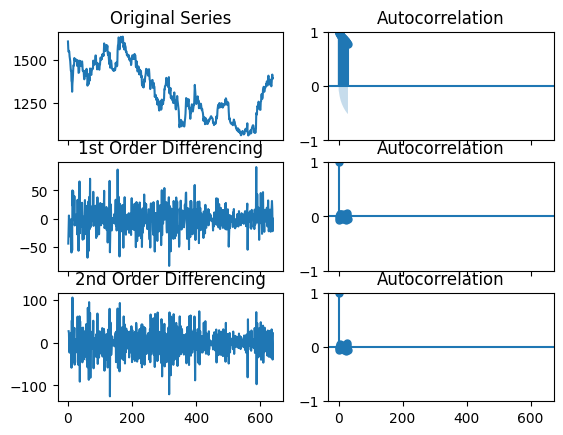

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, sharex=True)

# Access the first subplot (0, 0) and plot the original series
axes[0, 0].plot(df['Close'])
axes[0, 0].set_title('Original Series')

# Access the second subplot (0, 1) and plot the autocorrelation function
plot_acf(df['Close'], ax=axes[0, 1])

#1st Differencing
axes[1,0].plot(df['Close'].diff());axes[1,0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(),ax=axes[1,1])
#2nd Differencing
axes[2,0].plot(df['Close'].diff().diff());axes[2,0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().dropna(),ax=axes[2,1])
plt.show()


d=1


Lets find p value

           0
0   1.000000
1   0.987929
2   0.976667
3   0.966707
4   0.957127
5   0.948347
6   0.939271
7   0.929670
8   0.920763
9   0.911937
10  0.904295
11  0.895998
12  0.888390
13  0.881764
14  0.876566
15  0.870647
16  0.864588
17  0.857697
18  0.850093
19  0.843396
20  0.836399
21  0.828789
22  0.820564
23  0.812193
24  0.804843
25  0.798723
26  0.792474
27  0.785784
28  0.779340


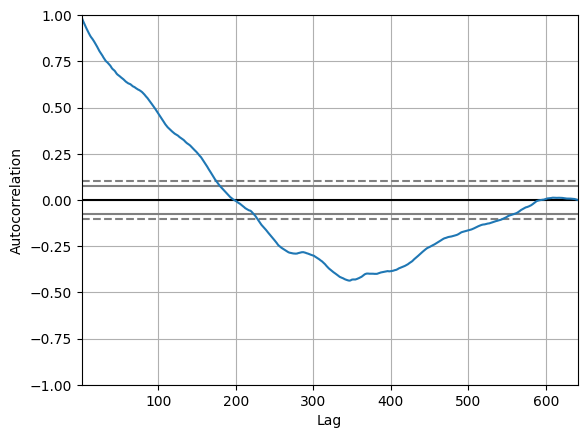

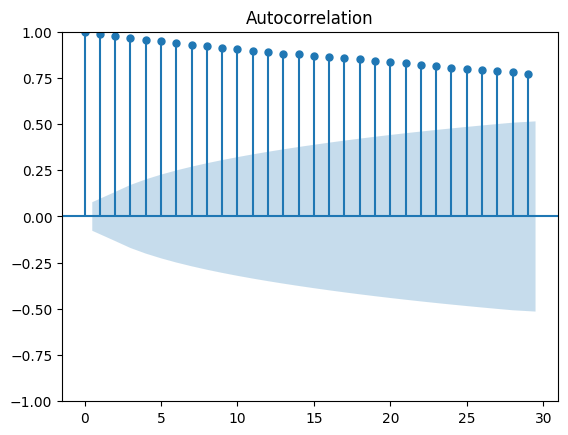

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pd.plotting.autocorrelation_plot(df['Close'])
plot_acf(df['Close'],alpha=0.05)
from statsmodels.tsa.stattools import acf,pacf
x_acf=pd.DataFrame(acf(df['Close']))
print(x_acf)

p=4

lets find q value

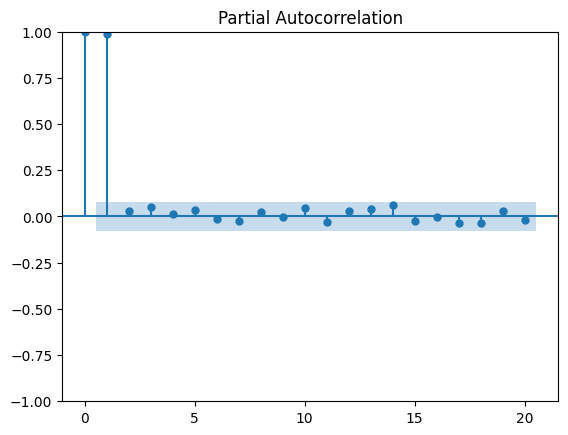

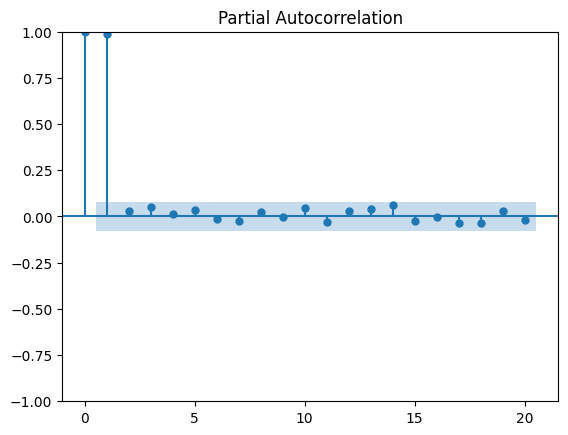

In [ ]:
#partial autocorrelation
from statsmodels.tsa.stattools import acf,pacf
plot_pacf(df['Close'],lags=20,alpha=0.05)

In [ ]:
p=4
d=1
q=2

In [ ]:
#lets run arima with pmdrima
!pip install pmdarima
from pmdarima.arima import auto_arima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.4 MB/s eta 0:00:00


In [ ]:
model=auto_arima(df['Close'],start_p=1,start_q=1,max_p=5,max_q=5,m=12,start_P=0,seasonal=True,D=1,d=1,trace=True,error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6074.763, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5908.119, Time=0.45 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6076.755, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5830.839, Time=1.65 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5828.839, Time=0.84 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5906.243, Time=0.42 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.46 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5830.839, Time=0.94 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5822.845, Time=3.97 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, T

In [ ]:
model=auto_arima(df['Close'],seasonal=True,suppress_warnings=True)

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  641
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2858.482
Date:                Thu, 17 Aug 2023   AIC                           5718.963
Time:                        05:30:08   BIC                           5723.425
Sample:                             0   HQIC                          5720.695
                                - 641                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       443.5828     17.721     25.031      0.000     408.850     478.316
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                99.39
Prob(Q):                              1.00   Pr

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  641
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2851.800
Date:                Thu, 17 Aug 2023   AIC                           5713.600
Time:                        05:30:09   BIC                           5735.908
Sample:                             0   HQIC                          5722.259
                                - 641                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8386      0.014     60.822      0.000       0.812       0.866
ar.L2         -0.9849      0.012    -80.404      0.000      -1.009      -0.961
ma.L1         -0.8635      0.017    -50.467      0.0

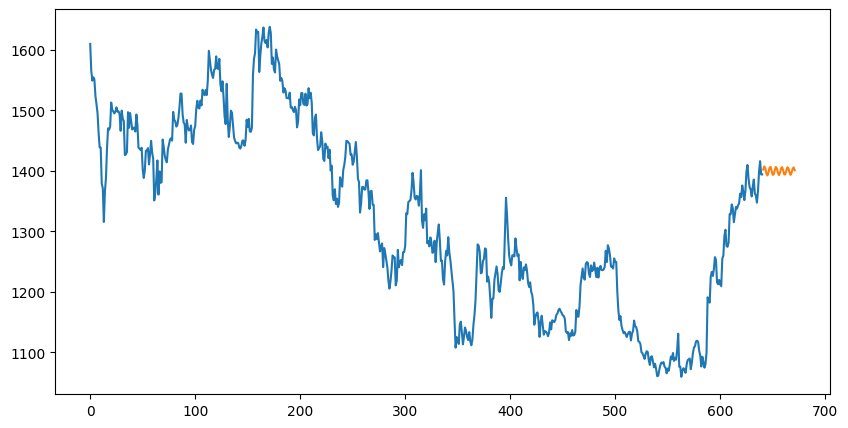

In [ ]:
#stats model and arima
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
p,d,q=2,1,2
model=ARIMA(df['Close'],order=(p,d,q))
model=model.fit()
print(model.summary())
#predict next 30 days
#forecast=model.predict(n_periods=30)
forecast=model.predict(len(df['Close']),len(df['Close'])+30)
print(forecast)
#plot forecast
plt.figure(figsize=(10,5))
plt.plot(df['Close'],label='Actual')
plt.plot(forecast,label='Forecast')

In [ ]:
 #lets sarima
 import statsmodels.api as sm
 import warnings
 p,d,q=4,1,2
 model=sm.tsa.statespace.SARIMAX(df['Close'],order=[p,d,q],seasonal_order=(p,d,q,12))
 model=model.fit()
 print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  641
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood               -2828.234
Date:                            Thu, 17 Aug 2023   AIC                           5682.469
Time:                                    05:31:22   BIC                           5740.222
Sample:                                         0   HQIC                          5704.905
                                            - 641                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6156      0.560     -1.100      0.271      -1.712       0.481
ar.L2         -0.5599      0.574   

In [ ]:
predictions = model.predict(start=len(df['Close']),end=len(df['Close'])+30)

In [ ]:
predictions

641    1390.278137
642    1391.821282
643    1392.160890
644    1388.454069
645    1384.549506
646    1384.822089
647    1383.808853
648    1384.103370
649    1379.498464
650    1382.258071
651    1383.652921
652    1384.351208
653    1382.115722
654    1382.233583
655    1381.993293
656    1380.238336
657    1378.562187
658    1378.989305
659    1378.991794
660    1380.766495
661    1376.217445
662    1378.798176
663    1379.338132
664    1380.798581
665    1377.934110
666    1378.004528
667    1378.461249
668    1376.118272
669    1374.351389
670    1373.400404
671    1372.062664
Name: predicted_mean, dtype: float64

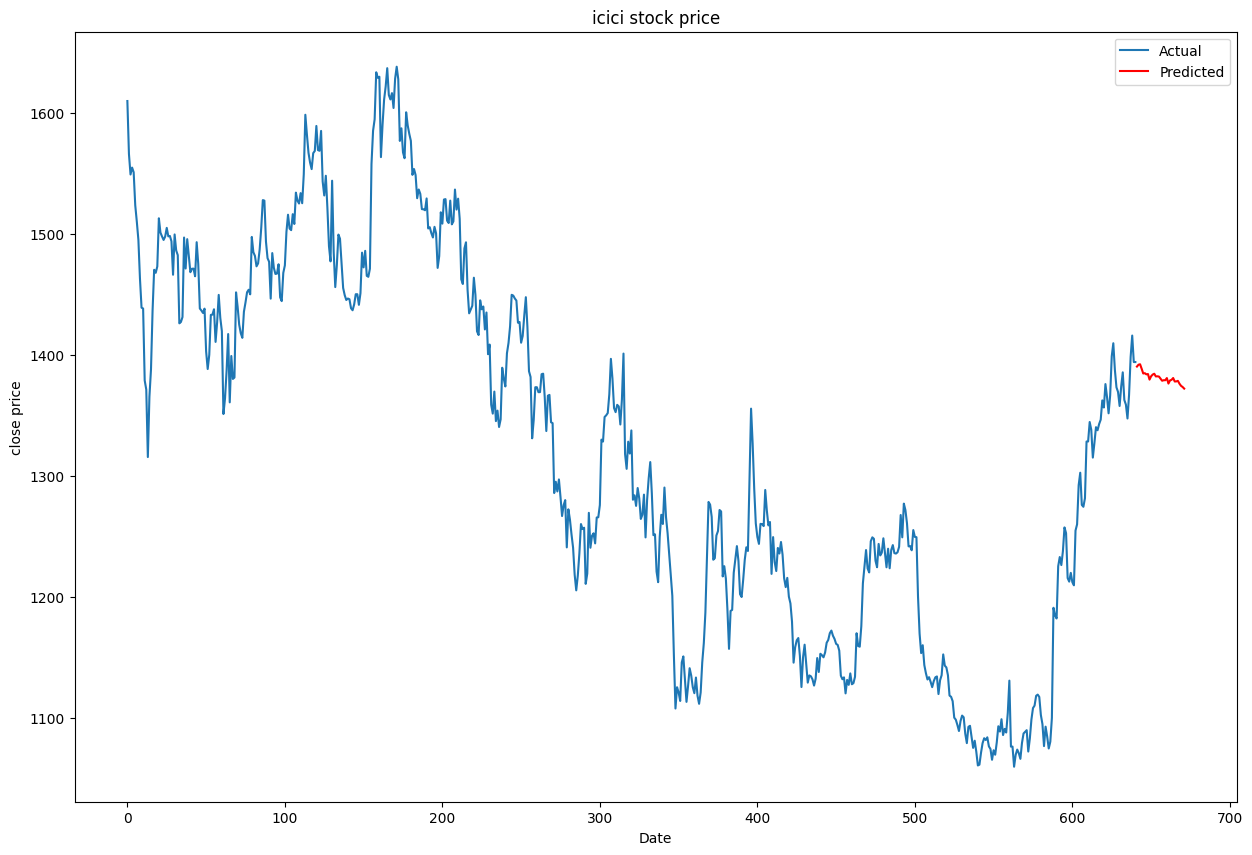

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df['Close'],label='Actual')
plt.plot(predictions,color='red',label='Predicted')
plt.xlabel('Date')
plt.ylabel('close price')
plt.title('icici stock price')
plt.legend()
plt.show()

Prophet Model

In [ ]:
!pip install prophet

In [ ]:
import prophet
from prophet import Prophet

In [ ]:
p = Prophet(interval_width=0.92, daily_seasonality=True)

In [ ]:
df=df[['Date','Close']]

In [ ]:
df.columns=['ds','y']

In [ ]:
model = p.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmppjguoai6/j9tahidh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjguoai6/z8bn4vlj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66494', 'data', 'file=/tmp/tmppjguoai6/j9tahidh.json', 'init=/tmp/tmppjguoai6/z8bn4vlj.json', 'output', 'file=/tmp/tmppjguoai6/prophet_modelwvxvxvz6/prophet_model-20230817053127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:31:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:31:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = p.make_future_dataframe(periods=200, freq='y')
future.tail()

,ds
836,2218-12-31
837,2219-12-31
838,2220-12-31
839,2221-12-31
840,2222-12-31


In [ ]:
forecast_prediction = p.predict(future)

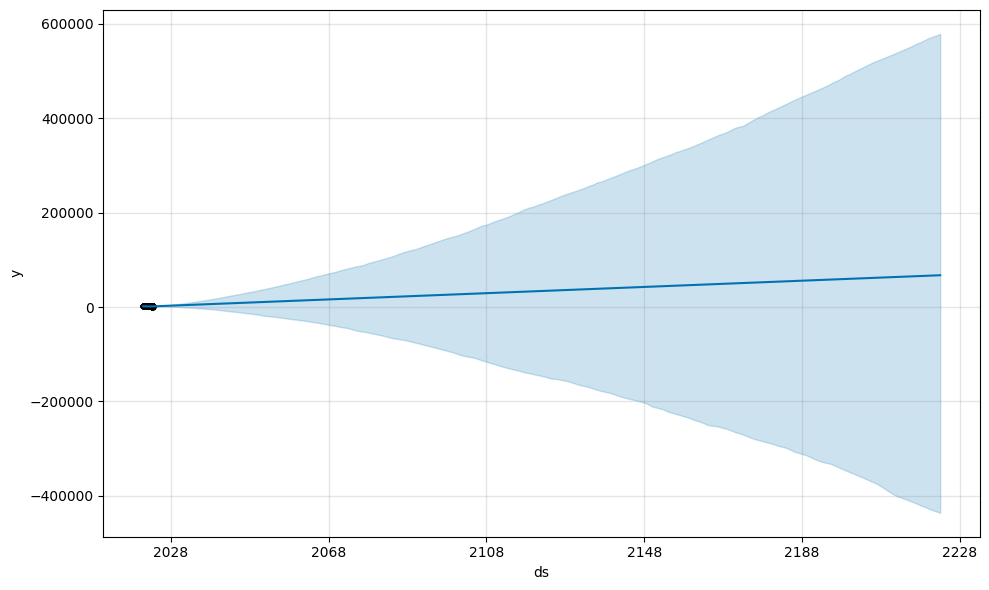

In [ ]:
plot1 = p.plot(forecast_prediction)

LSTM models

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from math import sqrt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
df4=df.copy()

In [ ]:
df=df['y']

In [ ]:
df

,ds,y
0,2021-01-11,1609.699951
1,2021-01-12,1565.949951
2,2021-01-13,1549.000000
3,2021-01-14,1554.699951
4,2021-01-15,1550.849976
...,...,...
636,2023-08-04,1366.900024
637,2023-08-07,1398.199951
638,2023-08-08,1415.900024
639,2023-08-09,1394.000000


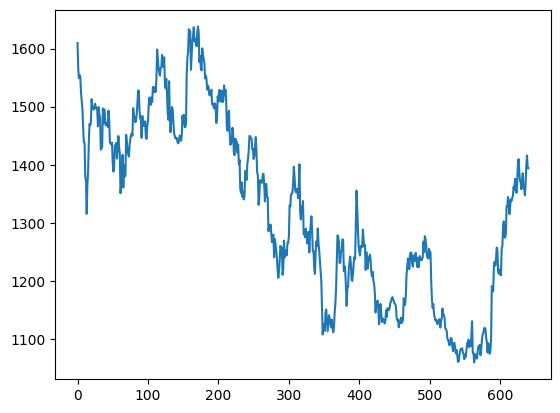

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
mape='10%'

In [ ]:
df.shape

(641, 1)

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(df,test_size=0.2,random_state=28)

In [ ]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)



In [ ]:
#reshape into X=y,t+1,t+2 and y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train[:100]

array([[[0.66678196],
        [0.65502632],
        [0.55674649],
        ...,
        [0.33373675],
        [0.46183765],
        [0.16137949]],

       [[0.65502632],
        [0.55674649],
        [0.75365203],
        ...,
        [0.46183765],
        [0.16137949],
        [0.95963334]],

       [[0.55674649],
        [0.75365203],
        [0.05782707],
        ...,
        [0.16137949],
        [0.95963334],
        [0.55398052]],

       ...,

       [[0.33373675],
        [0.46183765],
        [0.16137949],
        ...,
        [0.26977272],
        [0.76895149],
        [0.28489935]],

       [[0.46183765],
        [0.16137949],
        [0.95963334],
        ...,
        [0.76895149],
        [0.28489935],
        [0.60541106]],

       [[0.16137949],
        [0.95963334],
        [0.55398052],
        ...,
        [0.28489935],
        [0.60541106],
        [0.39882452]]])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 10s 406ms/step - loss: 0.1803 - val_loss: 0.0996
Epoch 2/100
7/7 [==============================] - 1s 200ms/step - loss: 0.0843 - val_loss: 0.0607
Epoch 3/100
7/7 [==============================] - 1s 194ms/step - loss: 0.0813 - val_loss: 0.0631
Epoch 4/100
7/7 [==============================] - 2s 273ms/step - loss: 0.0754 - val_loss: 0.0715
Epoch 5/100
7/7 [==============================] - 2s 299ms/step - loss: 0.0746 - val_loss: 0.0627
Epoch 6/100
7/7 [==============================] - 1s 192ms/step - loss: 0.0748 - val_loss: 0.0617
Epoch 7/100
7/7 [==============================] - 1s 195ms/step - loss: 0.0755 - val_loss: 0.0675
Epoch 8/100
7/7 [==============================] - 1s 195ms/step - loss: 0.0751 - val_loss: 0.0623
Epoch 9/100
7/7 [==============================] - 1s 196ms/step - loss: 0.0748 - val_loss: 0.0671
Epoch 10/100
7/7 [==============================] - 1s 196ms/step - loss: 0.0741 - val_loss: 0.0632
Epoch 11

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [ ]:
#calculate RMSE performance
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.2688958637795911

In [ ]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.2664373282601701

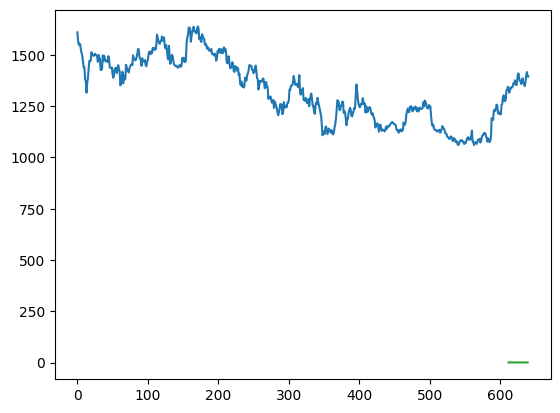

In [ ]:
#plotting
look_back=100
trainPredictPlot=np.empty_like(df)
trainPredictPlot[:,:]=np.nan
testPredictPlot=np.empty_like(df)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 10%
